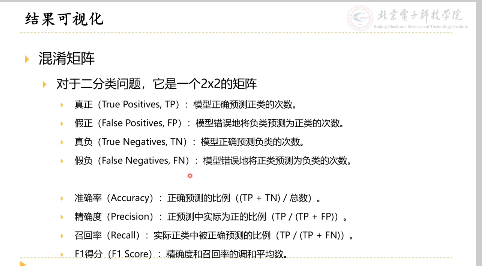

In [16]:
import warnings


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

#1. 导入库
# 已导入

#2. 加载数据集
# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 进保留前两种类别的样本和强两个特征（逻辑回归通常用于二分类问题）
X = X[y != 2, :2]
y = y[y != 2]

#3. 数据预处理
# 标准化
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#4. 特征工程
# 无

#5. 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#6. 训练模型，使用逻辑回归
model = LogisticRegression(solver='liblinear')
param_grid = {'C': [0.1, 1, 10,100], #正则化强度的导数
              'penalty': ['l1', 'l2']  #正则化方式
            }


grid_search = GridSearchCV(model, param_grid, cv=5,return_train_score=True)
grid_search.fit(X_train, y_train)

# 7. 网络搜索后的最佳参数和模型
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

#8. 模型评估
# 单独打印训练集和测试集上的精度
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Training accuracy: ", accuracy_score(y_train, y_train_pred))
print("Testing accuracy: ", accuracy_score(y_test, y_test_pred))

Best parameters:  {'C': 0.1, 'penalty': 'l1'}
Best score:  1.0
Training accuracy:  1.0
Testing accuracy:  1.0


In [17]:
# 9. 打印训练集和测试集的模型评估指标
print("训练集的模型评估指标：\n", classification_report(y_train, y_train_pred))
print("测试集的模型评估指标：\n",classification_report(y_test, y_test_pred))

训练集的模型评估指标：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        37

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

测试集的模型评估指标：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



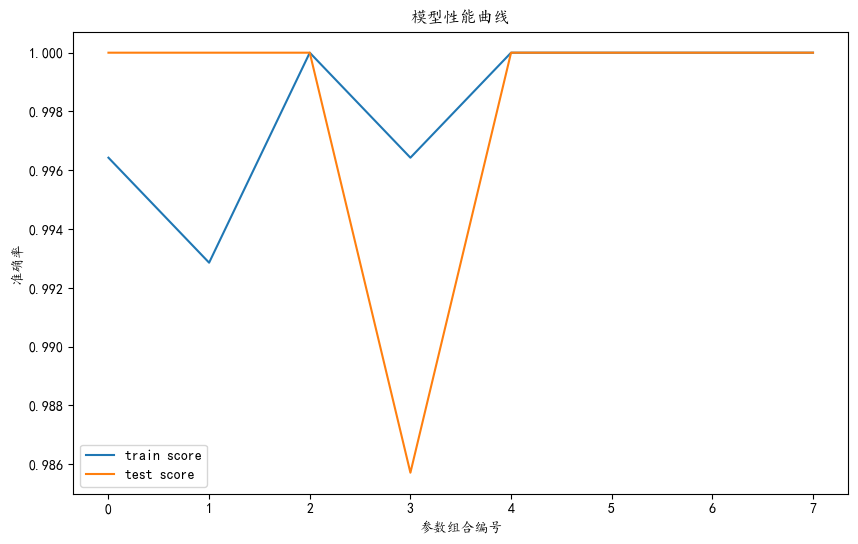

In [18]:

#10. 绘制模型的训练曲线
cv_results = grid_search.cv_results_
mean_train_score = cv_results['mean_train_score']
mean_test_score = cv_results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(mean_train_score, label='train score')
plt.plot(mean_test_score, label='test score')
plt.title("模型性能曲线")
plt.xlabel("参数组合编号")
plt.ylabel("准确率")
plt.legend()
plt.show()

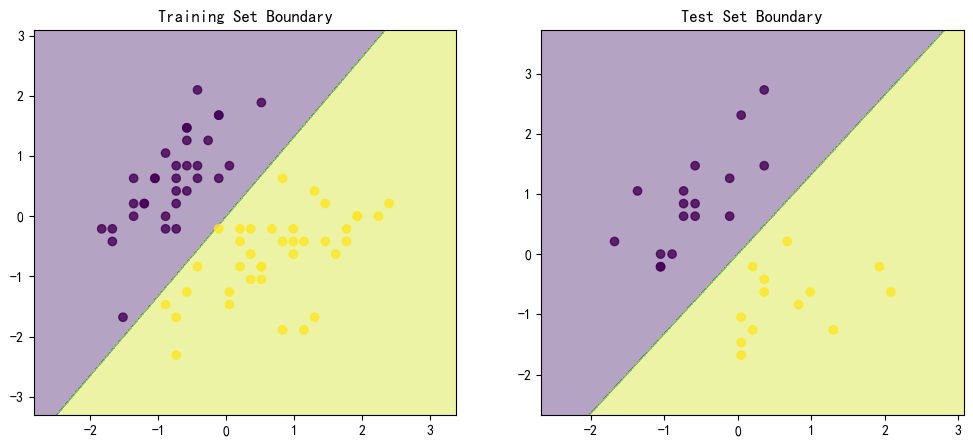

In [19]:
# 11. 分析结果可视化
#  函数: 绘制决策边界
def plot_decision_boundary(X, y,model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

# 绘制训练集的决策边界
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, best_model)
plt.title('Training Set Boundary')

# 绘制测试集的决策边界
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, best_model)
plt.title('Test Set Boundary')
plt.show()

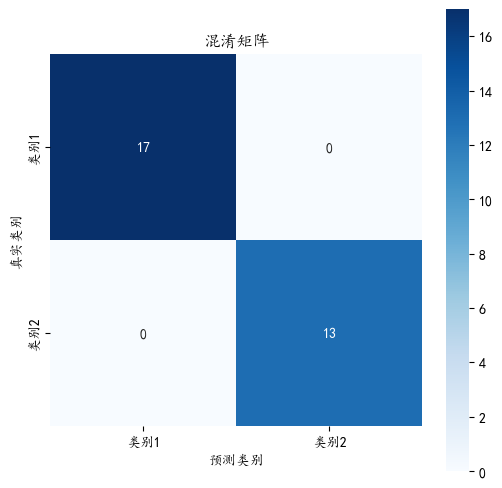

In [20]:
# 混淆矩阵可视化
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap='Blues',xticklabels=['类别1','类别2'],yticklabels=['类别1','类别2'])
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.title('混淆矩阵')
plt.show()

In [24]:
roc_curve(y_test, best_model.predict_proba(X_test)[:,1])


(array([0.        , 0.        , 0.        , 0.11764706, 0.23529412,
        1.        ]),
 array([0.        , 0.07692308, 1.        , 1.        , 1.        ,
        1.        ]),
 array([       inf, 0.92058814, 0.58522608, 0.32691305, 0.29795932,
        0.11206548]))

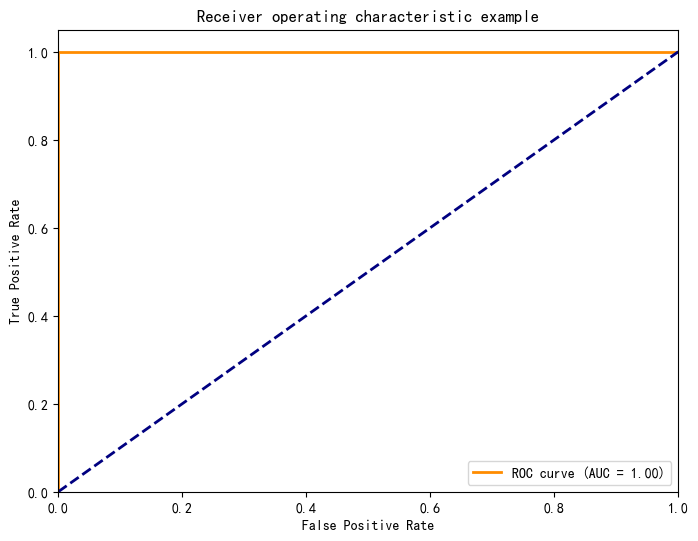

In [25]:
# 计算ROC曲线和AUC值
fpr,tpr,_ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
auc = auc(fpr,tpr)

# 绘制ROC曲线
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()